 # offline: design the trajectory for 6DOF of end-effector of Kinova 

In [46]:
import numpy as np
import math as math
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
import matplotlib as mpl

In [47]:
# consider of three objects on a circle
Obj1_Pos = [-0.35, -0.35, 0.2]
Obj2_Pos = [-0.5, 0, 0.2]
Obj3_Pos = [-0.35, 0.35, 0.2]

# these angles should be the corresponding euler angles for final end-effector grasp pose 
# possible final value for grasping obj1 [Roll, Pitch, Yaw] 
Obj1_Orn = [math.pi/3, 0, 0]
# possible final value for grasping obj2 [Roll, Pitch, Yaw]
Obj2_Orn = [0, math.pi/2, 0]
# possible final value for grasping obj3 [Roll, Pitch, Yaw]
Obj3_Orn = [0, 0, -math.pi/2]


# Object informations
# object 1
X_f1 = Obj1_Pos[0]
Y_f1 = Obj1_Pos[1]
Z_f1 = Obj1_Pos[2]
Roll_f1 = Obj1_Orn[0]
Pitch_f1 = Obj1_Orn[1]
Yaw_f1 = Obj1_Orn[2]
# object 2
X_f2 = Obj2_Pos[0]
Y_f2 = Obj2_Pos[1]
Z_f2 = Obj2_Pos[2]
Roll_f2 = Obj2_Orn[0]
Pitch_f2 = Obj2_Orn[1]
Yaw_f2 = Obj2_Orn[2]
# object 3
X_f3 = Obj3_Pos[0]
Y_f3 = Obj3_Pos[1]
Z_f3 = Obj3_Pos[2]
Roll_f3 = Obj3_Orn[0]
Pitch_f3 = Obj3_Orn[1]
Yaw_f3 = Obj3_Orn[2]


# the initial position/orientation data for the end-effector

# in meter
pos_0 = [-0.16466346383094788, -0.08997702598571777, 0.24762019515037537]
# in radian
eulOrn_0 = (3.0612682251627628, 0.10540373927460898, 1.199751013269177)

X_0 = pos_0[0]
Y_0 = pos_0[1]
Z_0 = pos_0[2]
Roll_0, Pitch_0, Yaw_0 = eulOrn_0 

# the final desired positions and orientations
Obj_Pos = [-0.35, -0.35, 0.2]
Obj_Orn = [math.pi/2, math.pi/3, 2*math.pi/3]
X_f = Obj_Pos[0]
Y_f = Obj_Pos[1]
Z_f = Obj_Pos[2]
Roll_f = Obj_Orn[0] 
Pitch_f = Obj_Orn[1]
Yaw_f = Obj_Orn[2] 



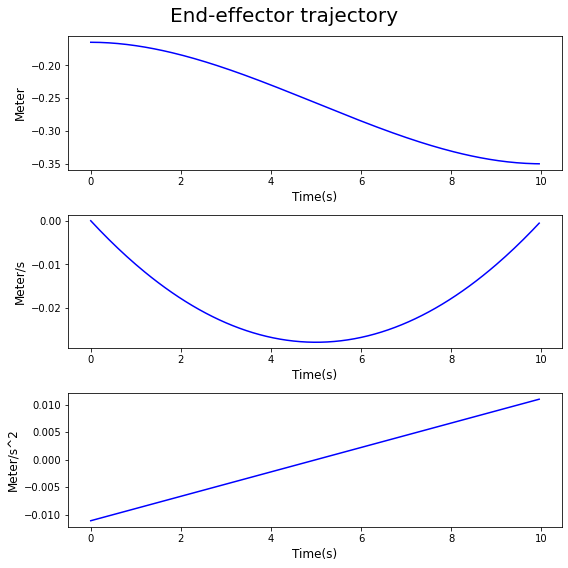

In [53]:
# desgin of trajectory for individual positions and orientation 
# method of desgin: Time history of position(orientation), velocity(angular vel) and acceleration(angular acc) with a cubic polynomial timing law
# the general equation: q(t) = a3*t^3 + a2*t^2 + a1*t + a0
# assumption; the initial vel and final vel is zero

# the final time: t_f
t_f = 10 # second
timestep = 0.05 # frequency
t = np.arange(0,t_f,timestep)

def FindCoeffs(t_f, Initial, Final):
    a0 = Initial
    a3, a2 = symbols('a3 a2')
    eq1 = Eq(a3*(t_f**3)+a2*(t_f**2)+a0 - Final,0)
    eq2 = Eq(3*a3*(t_f**2)+2*a2*t_f,0)
    sol_dict = solve((eq1,eq2), (a3, a2))
    A3 = sol_dict[a3]
    A2 = sol_dict[a2]
    
    return A3, A2

def FindKinematics(t, Initial, A3, A2):
    a0 = Initial
    # position
    Pos = A3*(t**3)+A2*(t**2)+a0
    # change the dtype and give it 2D
    Pos = Pos.astype('float64')
    Pos = np.array([Pos])
    
    # velocity
    Vel = 3*A3*(t**2)+2*A2*t
    # change the dtype and give it 2D
    Vel = Vel.astype('float64')
    Vel = np.array([Vel])

    # acceleration
    Accel = 6*A3*(t)+2*A2
    # change the dtype and give it 2D
    Accel = Accel.astype('float64')
    Accel = np.array([Accel])

    
    return Pos, Vel, Accel



# for x position
Initial = X_0
Final = X_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
X_Pos, X_Vel, X_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,X_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,X_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,X_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)


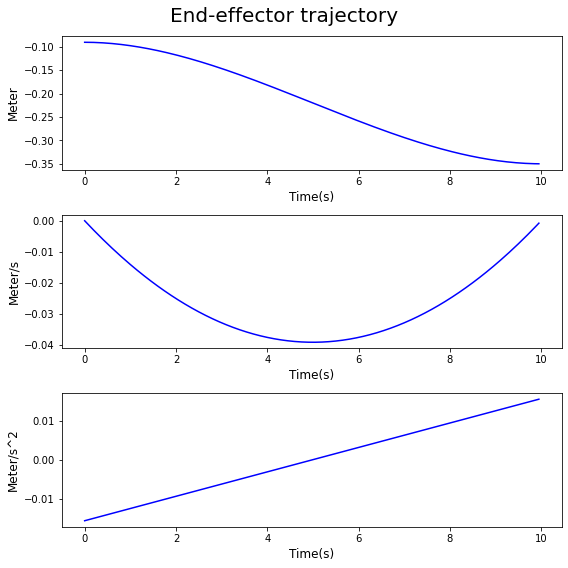

In [54]:
# for y position
Initial = Y_0
Final = Y_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Y_Pos, Y_Vel, Y_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,Y_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,Y_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,Y_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

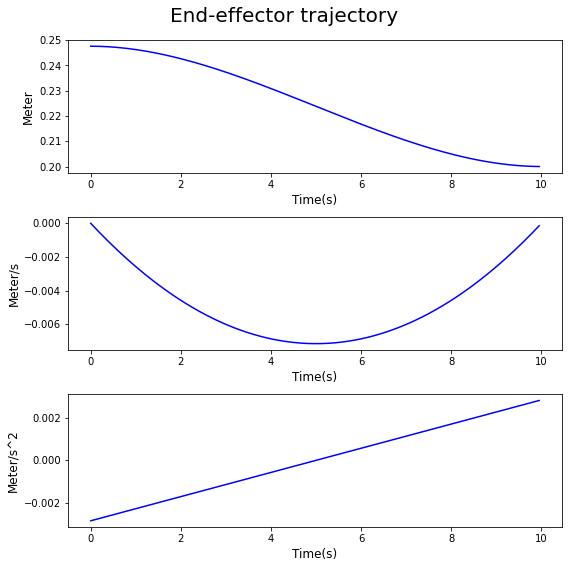

In [55]:
# for y position
Initial = Z_0
Final = Z_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Z_Pos, Z_Vel, Z_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,Z_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,Z_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,Z_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Meter/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

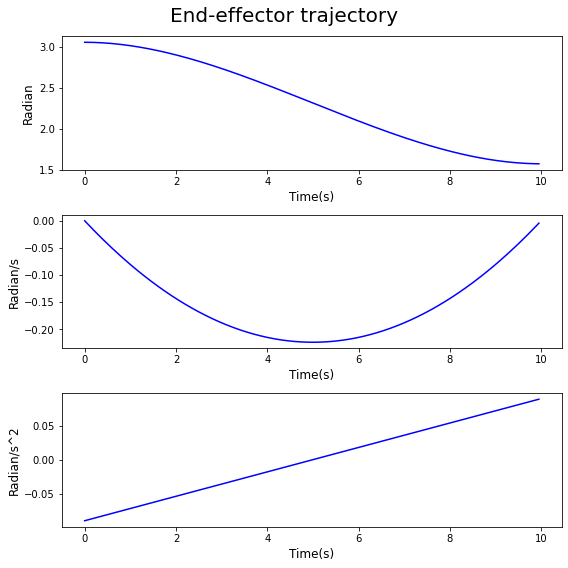

In [57]:
# for roll orientation
Initial = Roll_0
Final = Roll_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Roll_Pos, Roll_Vel, Roll_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,Roll_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,Roll_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,Roll_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

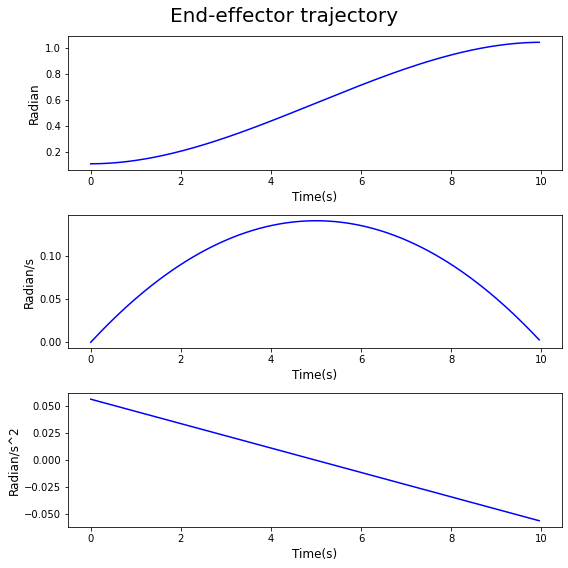

In [58]:
# for pitch orientation
Initial = Pitch_0
Final = Pitch_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Pitch_Pos, Pitch_Vel, Pitch_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,Pitch_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,Pitch_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,Pitch_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

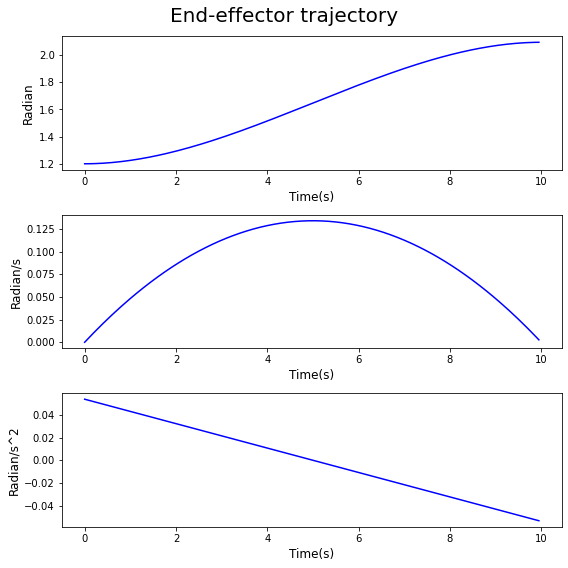

In [59]:
# for yaw orientation
Initial = Yaw_0
Final = Yaw_f
A3, A2 = FindCoeffs(t_f, Initial, Final)
Yaw_Pos, Yaw_Vel, Yaw_Accel = FindKinematics(t, Initial, A3, A2)

# plot the trajectory information
fig, axes = plt.subplots(3,1,figsize=(8,8))
fig.suptitle('End-effector trajectory', fontsize=20)

for kin in range(3):

    if kin == 0:
        axes[kin].plot(t,Yaw_Pos.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 1:
        axes[kin].plot(t,Yaw_Vel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
    elif kin == 2:
        axes[kin].plot(t,Yaw_Accel.T,'b')
        
        axes[kin].set_xlabel('Time(s)',fontsize=12)
        axes[kin].set_ylabel('Radian/s^2',fontsize=12)
        #axes[position].set_ylim([-1,1])
        
plt.tight_layout()
#plt.savefig('./OfflineResults/PositionRollPitchRaw_Obj'+str(obj)+'.png',facecolor='w', transparent=False, dpi=300)

# Saving the kinematics for later reading in online performance 

In [64]:
Kins_Pos = np.concatenate((X_Pos.T, Y_Pos.T, Z_Pos.T, Roll_Pos.T, Pitch_Pos.T, Yaw_Pos.T), axis = 1)

In [65]:
Kins_Pos.shape

(200, 6)

In [66]:
type(Kins_Pos)

numpy.ndarray

In [71]:
with open('./PlannedTrajectories/Kins_Pos.npy', 'wb') as f:
    np.save(f, Kins_Pos)


In [72]:
with open('./PlannedTrajectories/Kins_Pos.npy', 'rb') as f:
    data = np.load(f)

In [74]:
data.shape[0]

200